<a href="https://colab.research.google.com/github/eliezerkapish/Data-Science-Projects/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Objective**

**The main objective is to identify possible fraud activities and theft through e-commerce website from Walmart in Central Florida, to serve as model to other regions.**

## **2. Loading Packages**

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


## **3. Importing Datasets**



In [ ]:
orders = pd.read_csv('/content/drive/MyDrive/WaltMart/5qPZ8EyPSau2UNVvdRak_orders.csv')

In [ ]:
drivers = pd.read_csv('/content/drive/MyDrive/WaltMart/DASNKm5LTPy2hXX0dM0D_drivers_data.csv')

In [ ]:
products = pd.read_csv('/content/drive/MyDrive/WaltMart/PGqj7HULTByfy23R8vxN_products_data.csv')

In [ ]:
missing_items = pd.read_csv('/content/drive/MyDrive/WaltMart/LKyEGqe9QsWdRFCujqRc_missing_items_data.csv')

In [ ]:
products = pd.read_csv('/content/drive/MyDrive/WaltMart/PGqj7HULTByfy23R8vxN_products_data.csv')

## **4. Head of Datasets**

In [ ]:
orders.head()

,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,driver_id,customer_id
0,2023-01-01,c9da15aa-be24-4871-92a3-dfa7746fff69,"$1,095.54",Winter Park,10,1,8:37:28,WDID10627,WCID5031
1,2023-01-01,ccacc183-09f8-4fd5-af35-009d18656326,$659.11,Altamonte Springs,11,1,9:31:17,WDID10533,WCID5794
2,2023-01-01,f4e1d30b-c3d1-413f-99b8-93c0b46d68bf,$251.45,Winter Park,18,1,10:43:49,WDID10559,WCID5599
3,2023-01-01,993d31f4-9358-41f0-a371-0021e55cef5d,$598.83,Altamonte Springs,12,1,9:48:33,WDID10622,WCID5005
4,2023-01-01,3e0a8f1b-3cd6-4d64-90e3-6b38dc368925,$27.18,Clermont,3,1,10:09:49,WDID10654,WCID5114


In [ ]:
drivers.head()

,driver_id,driver_name,age,Trips
0,WDID09873,Pamela Moore,18,64
1,WDID09874,Billy Lawson,18,37
2,WDID09875,Stephen Randolph,18,64
3,WDID09876,Jordan Daniel,18,53
4,WDID09877,James White,18,14


In [ ]:
products.head()

,produc_id,product_name,category,price
0,PWPX0982761090982,Kellogg's Frosties,Supermarket,$12.53
1,PWPX0982761090983,Uncured Bacon,Supermarket,$4.67
2,PWPX0982761090984,Whole Milk,Supermarket,$9.95
3,PWPX0982761090985,Organic Bananas,Supermarket,$3.94
4,PWPX0982761090986,Sourdough Bread,Supermarket,$19.77


In [ ]:
missing_items.head()

,order_id,product_id_1,product_id_2,product_id_3
0,c7a343f7-3f1d-497c-8004-b9ede2d48fb1,PWPX0982761090982,PWPX0982761090982,PWPX0982761090982
1,20698293-8399-4fda-af1e-b61a9ebb8a0a,PWPX0982761090983,PWPX0982761090983,PWPX0982761090983
2,d7f690a0-c1c2-4b36-b05f-2b7e641ea1ac,PWPX0982761090984,PWPX0982761090984,PWPX0982761090984
3,d5cea1eb-7016-451b-9426-51973f4d6e14,PWPX0982761090985,PWPX0982761090985,PWPX0982761090985
4,2f7cbda8-793a-4a1d-bb66-3a514bee5dc4,PWPX0982761090986,PWPX0982761090986,PWPX0982761090986


In [ ]:
products.head()

,produc_id,product_name,category,price
0,PWPX0982761090982,Kellogg's Frosties,Supermarket,$12.53
1,PWPX0982761090983,Uncured Bacon,Supermarket,$4.67
2,PWPX0982761090984,Whole Milk,Supermarket,$9.95
3,PWPX0982761090985,Organic Bananas,Supermarket,$3.94
4,PWPX0982761090986,Sourdough Bread,Supermarket,$19.77


## **5. Data Manipulation and Formatting**

### 5.1 Combining (JOIN) all datasets in a sigle dataset using SQL

In [ ]:
walmart = pd.read_csv('/content/drive/MyDrive/WaltMart/walmart-join-all-walmart-fraud-detection-QueryResult.csv')

In [ ]:
walmart

,date,o.order_id,order_amount,region,items_delivered,items_missing,delivery_hour,o.driver_id,o.customer_id,c.customer_id,...,p1.category,p1.price,p2.produc_id,p2.product_name,p2.category,p2.price,p3.produc_id,p3.product_name,p3.category,p3.price
0,2023-10-17,f9090919-39bf-4536-a0a4-09e45c3c1ccd,175.63,Winter Park,4,0,12:18:47,WDID10180,WCID5451,WCID5451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-10-17,2ad7f4db-ee3f-427a-a104-2d67f0d66380,21.59,Apopka,12,0,02:31:41,WDID09966,WCID5988,WCID5988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-10-17,405b61fa-ab20-4f60-a941-71172b8dca1e,327.54,Winter Park,12,0,08:14:13,WDID10190,WCID5409,WCID5409,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-10-17,7cd88de0-a0fa-43bc-88b9-bf63769e674a,209.19,Winter Park,5,0,09:48:04,WDID10485,WCID5703,WCID5703,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-10-17,dced7072-55e7-4078-9505-912a9de3e3e4,481.78,Altamonte Springs,15,0,04:27:34,WDID10854,WCID5392,WCID5392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2023-05-21,a5512b75-16f9-4595-940c-ef265d8c6fed,118.03,Apopka,8,0,12:28:55,WDID10567,WCID5198,WCID5198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,2023-05-22,4cee270d-a66c-4449-be62-b7f3ccd79406,21.23,Apopka,14,1,06:59:57,WDID10720,WCID5137,WCID5137,...,Pantry,12.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,2023-05-22,66f99f13-5463-42cd-80c0-45de04df1854,74.00,Orlando,15,1,06:52:36,WDID10468,WCID5189,WCID5189,...,Produce,12.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,2023-05-22,228decf9-8350-4226-9e07-b20ecd2f5482,489.66,Winter Park,8,0,03:18:06,WDID09876,WCID5869,WCID5869,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 5.2 Formatting Dolar $

In [ ]:
# Formatting oder amount
walmart['order_amount'] = walmart['order_amount'].replace('[\$,]', '', regex=True).astype(float)
# Formatting price columns in the 'walmart' dataset

# List of price columns
price_columns = ['p1.price', 'p2.price', 'p3.price']

# Removing symbols ($, ,) and converting to float
for col in price_columns:
    if col in walmart.columns:  # Check if the column exists
        walmart[col] = walmart[col].replace('[\$,]', '', regex=True).astype(float)

# Displaying the first 10 values after formatting
print(walmart[price_columns].head(10))

print(walmart['order_amount'])

   p1.price  p2.price  p3.price
0       NaN       NaN       NaN
1       NaN       NaN       NaN
2       NaN       NaN       NaN
3       NaN       NaN       NaN
4       NaN       NaN       NaN
5       NaN       NaN       NaN
6       NaN       NaN       NaN
7       NaN       NaN       NaN
8       NaN       NaN       NaN
9       NaN       NaN       NaN
0       175.63
1        21.59
2       327.54
3       209.19
4       481.78
         ...  
9995    118.03
9996     21.23
9997     74.00
9998    489.66
9999     30.04
Name: order_amount, Length: 10000, dtype: float64


### 5.3 Formatting Date e Time

In [ ]:
# Formatting the 'delivery_hour' column in the 'walmart' dataset

# Converting 'delivery_hour' to datetime and extracting the hour as an integer
walmart['delivery_hour'] = pd.to_datetime(walmart['delivery_hour'], format='%H:%M:%S').dt.hour

# Displaying the first 10 rows to verify the changes
print(walmart[['delivery_hour']].head(10))


   delivery_hour
0             12
1              2
2              8
3              9
4              4
5             23
6              6
7             15
8             12
9              9


## **6. Exploratory Data Analysis (EDA)**

### 6.1 Missing items by delivery hour

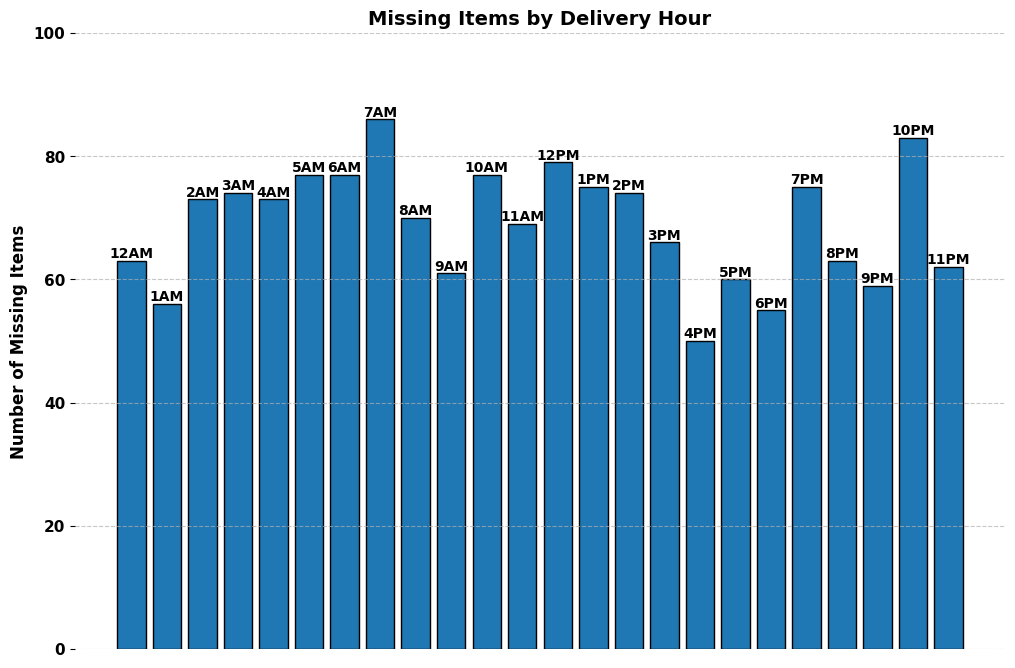

In [ ]:
# Grouping and summing up missing items by delivery hour
missing_items_by_hour = walmart.groupby('delivery_hour')['items_missing'].sum()

# Labels for hours in 12AM, 1AM format
hour_labels = [
    '12AM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM', '7AM', '8AM', '9AM', '10AM', '11AM',
    '12PM', '1PM', '2PM', '3PM', '4PM', '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM'
]

# Creating the plot
plt.figure(figsize=(12, 8))
bars = plt.bar(missing_items_by_hour.index, missing_items_by_hour.values, edgecolor='black')

# Adding labels on top of the bars
for bar, hour in zip(bars, missing_items_by_hour.index):
    plt.text(bar.get_x() + bar.get_width() / 2,  # Centered on the bar
             bar.get_height(),                  # Positioned at the top of the bar
             hour_labels[hour],                 # AM/PM format
             ha='center', va='bottom',
             fontsize=10, fontweight='bold')

# Removing spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Adjusting plot settings
plt.xlabel('')  # Remove X-axis label
plt.ylabel('Number of Missing Items', fontsize=12, fontweight='bold')
plt.title('Missing Items by Delivery Hour', fontsize=14, fontweight='bold')

# Formatting Y-axis ticks and labels
plt.gca().yaxis.set_tick_params(labelsize=11)
plt.gca().set_yticks(plt.gca().get_yticks())
plt.gca().set_yticklabels([f'{int(label)}' for label in plt.gca().get_yticks()], fontweight='bold')

# Removing X-axis values and adding gridlines
plt.xticks([])  # Remove X-axis values
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the plot
plt.show()



**High missing rates during early mornings (6–7 AM) and late nights (10–11 PM) suggest inventory restocking issues, low staffing levels, or suspicious activity.**

### 6.2 Missing items by driver

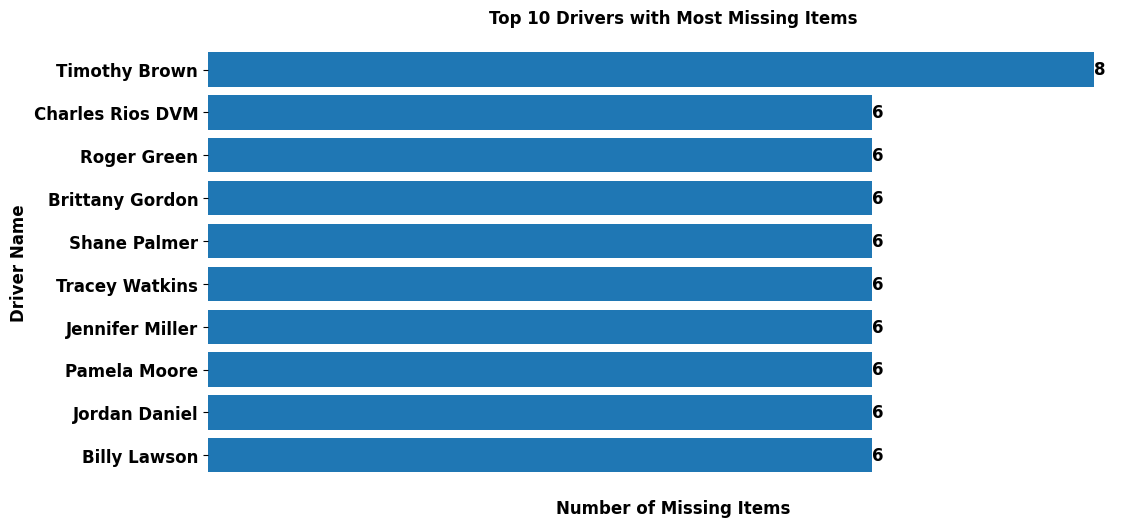

In [ ]:
## Summing missing items by driver
missing_items_by_driver = walmart.groupby('driver_name')['items_missing'].sum()

# Getting the top 10 drivers with the most missing items
top_missing_drivers = missing_items_by_driver.sort_values(ascending=False).head(10)

# Plotting the top 10 drivers with the most missing items
plt.figure(figsize=(12, 6))
bars = plt.barh(top_missing_drivers.sort_values().index,  # Sort for horizontal plot
                top_missing_drivers.sort_values().values,
                color='#1f77b4')  # Use blue color

# Adding labels on the bars
for bar, value in zip(bars, top_missing_drivers.sort_values().values):
    plt.text(value,
             bar.get_y() + bar.get_height() / 2,
             f'{int(value)}',  # Display the value
             ha='left', va='center', fontsize=12, fontweight='bold')  # Set font size to 12

# Plot settings
plt.ylabel('Driver Name', fontweight='bold', fontsize=12)  # Bold Y-axis label with font size 12
plt.xlabel('Number of Missing Items', fontweight='bold', fontsize=12)  # Bold X-axis label with font size 12
plt.title('Top 10 Drivers with Most Missing Items', fontweight='bold', fontsize=12)  # Bold title with font size 12

# Formatting axis labels
plt.yticks(fontweight='bold', fontsize=12)  # Driver names in bold and font size 12

# Remove numbers (ticks) from the X-axis
plt.xticks([])

# Remove spines (caixa ao redor do plot)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.show()

**This graph can help us indentify a possible fraud activity by drivers with recurrent missing items.**

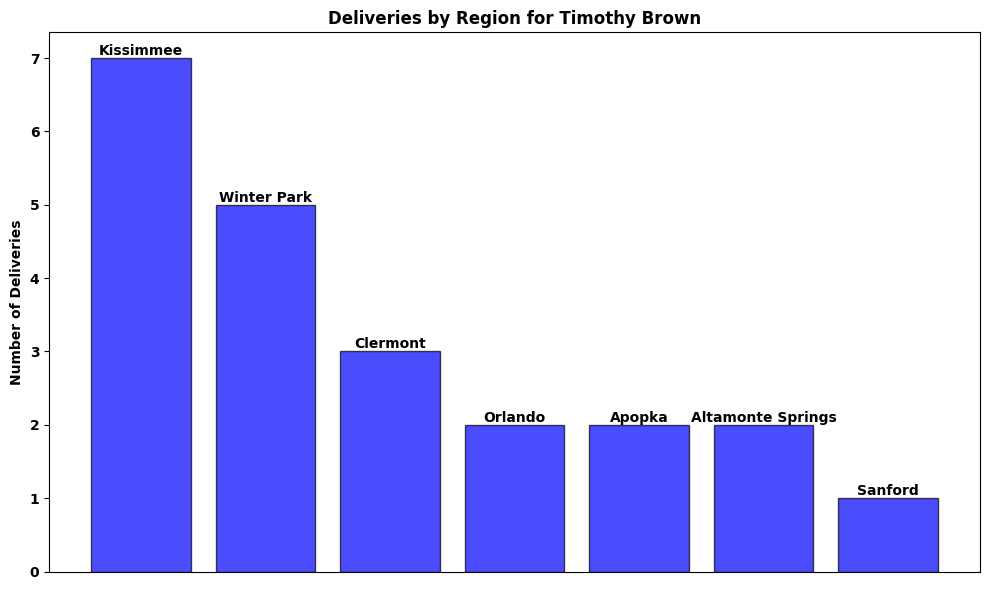

In [ ]:
# Filter data for deliveries made by Timothy Brown
timothy_data = walmart[walmart['driver_name'] == 'Timothy Brown']

# Count deliveries by region
deliveries_by_region = timothy_data['region'].value_counts()

# Create a bar plot with blue bars
plt.figure(figsize=(10, 6))
bars = plt.bar(deliveries_by_region.index, deliveries_by_region.values, color='blue', alpha=0.7, edgecolor='black')

# Add region names at the top of each bar with larger font size
for bar, region in zip(bars, deliveries_by_region.index):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             region, ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot settings
plt.xlabel('')  # Remove X-axis label
plt.ylabel('Number of Deliveries', fontweight='bold')  # Bold Y-axis label
plt.title('Deliveries by Region for Timothy Brown', fontweight='bold')  # Bold title

# Remove region names from X-axis
plt.xticks([])  # Hide X-axis labels
plt.yticks(fontweight='bold')  # Bold Y-axis numbers
#plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()







**Based on the previous graph, Timothy Brown was idenfied with one of the most drivers with recurrent missing items. The following graph shows us the number of the deliveries made by Timothy Brown by region.**

### 6.3 Missing Items By Region

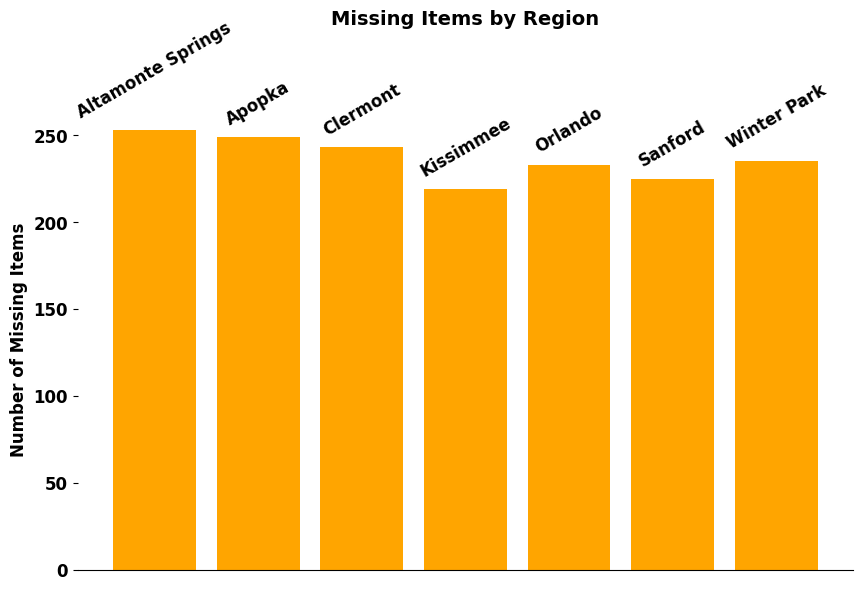

In [ ]:
# Grouping and summing missing items by region
missing_items_by_region = walmart.groupby('region')['items_missing'].sum()

# Creating the plot with orange bars
plt.figure(figsize=(10, 6))
bars = plt.bar(missing_items_by_region.index, missing_items_by_region.values, color='orange')  # Set color to orange

# Adding region names on top of the bars with an angled rotation to avoid overlap
for bar, region in zip(bars, missing_items_by_region.index):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 5,            # Adjust position slightly above the bar
             region,                           # Region name
             ha='center', va='bottom',
             fontsize=12, fontweight='bold', rotation=30)  # Rotation for better readability

# Plot settings
plt.xlabel('')  # Remove X-axis label
plt.ylabel('Number of Missing Items', fontsize=12, fontweight='bold')  # Y-axis label
plt.title('Missing Items by Region', fontsize=14, fontweight='bold', pad=60)  # Title moved up

# Adjusting the spines to maintain the X-axis line
plt.gca().spines['top'].set_visible(False)  # Hide top spine
plt.gca().spines['right'].set_visible(False)  # Hide right spine
plt.gca().spines['left'].set_visible(False)  # Hide left spine
plt.gca().spines['bottom'].set_visible(True)  # Keep the bottom spine (X-axis)

# Formatting X-axis ticks
plt.xticks([])  # Remove X-axis region names

# Formatting Y-axis ticks with bold font
yticks = [tick for tick in plt.gca().get_yticks() if tick != 300]  # Exclude 300 from the ticks
plt.gca().set_yticks(yticks)  # Set the modified ticks
plt.gca().set_yticklabels([f'{int(label)}' for label in yticks], fontweight='bold', fontsize=12)  # Bold and fontsize

# Adding gridlines to Y-axis
#plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the plot
plt.show()

**This graph shows that the region in Altamonte Springs has the most nummber of missing items. Kissimmee it's in fourth position, which tells me that aren't a high correlation with the deliveries by Thimothy Browm.**

### 6.4 Missing items by customer name

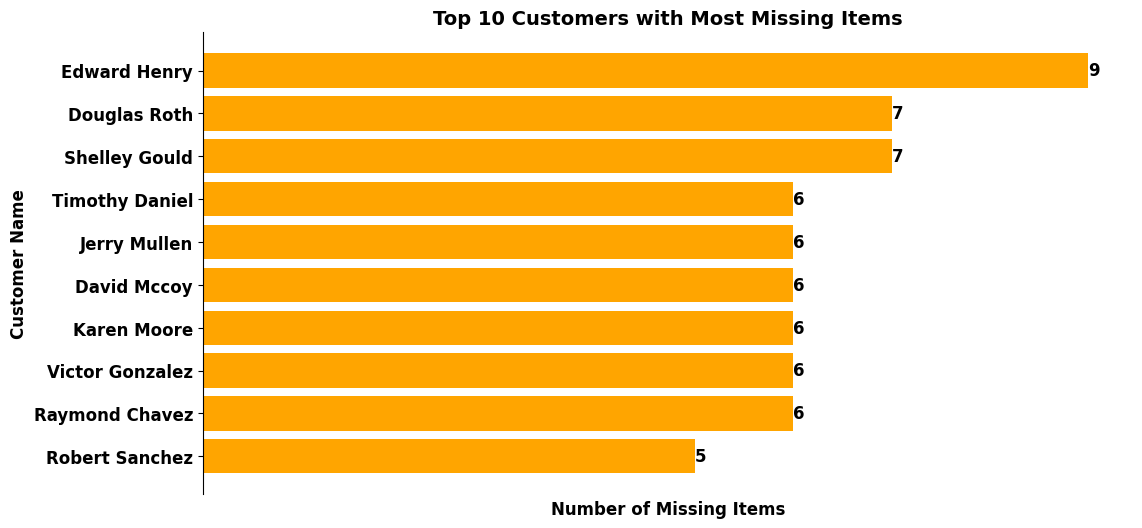

In [ ]:
# Grouping and summing missing items by customer name
missing_items_by_customer = walmart.groupby('customer_name')['items_missing'].sum()

# Getting the top 10 customers with the most missing items
top_missing_customers = missing_items_by_customer.sort_values(ascending=False).head(10)

# Plotting the top 10 customers with the most missing items
plt.figure(figsize=(12, 6))
bars = plt.barh(top_missing_customers.sort_values().index,  # Sort for horizontal plot
                top_missing_customers.sort_values().values,
                color='orange')  # Set bar color to orange

# Adding labels on the bars
for bar, value in zip(bars, top_missing_customers.sort_values().values):
    plt.text(value,
             bar.get_y() + bar.get_height() / 2,
             f'{int(value)}',  # Display the value
             ha='left', va='center', fontsize=12, fontweight='bold')

# Plot settings
plt.ylabel('Customer Name', fontweight='bold', fontsize=12)  # Bold Y-axis label with larger font
plt.xlabel('Number of Missing Items', fontweight='bold', fontsize=12)  # Bold X-axis label with larger font
plt.title('Top 10 Customers with Most Missing Items', fontweight='bold', fontsize=14)  # Bold title with larger font

# Adjusting the spines to remove the box and keep only the Y-axis line
plt.gca().spines['top'].set_visible(False)  # Hide top spine
plt.gca().spines['right'].set_visible(False)  # Hide right spine
plt.gca().spines['bottom'].set_visible(False)  # Hide bottom spine
plt.gca().spines['left'].set_visible(True)  # Keep left spine (Y-axis)

# Formatting Y-axis labels with increased font size
plt.yticks(fontweight='bold', fontsize=12)  # Customer names in bold with font size 12

# Removing X-axis numbers
plt.xticks([])  # Remove X-axis numbers

# Removing gridlines on X-axis
plt.grid(axis='x', linestyle='--', alpha=0.0)  # Disable gridlines on X-axis

# Displaying the plot
plt.show()


**The graph shows the top 10 customres with the missing items, which can be use for further analysis as possible fraud caused by the costumer.**

### 6.5 Missing items by product category

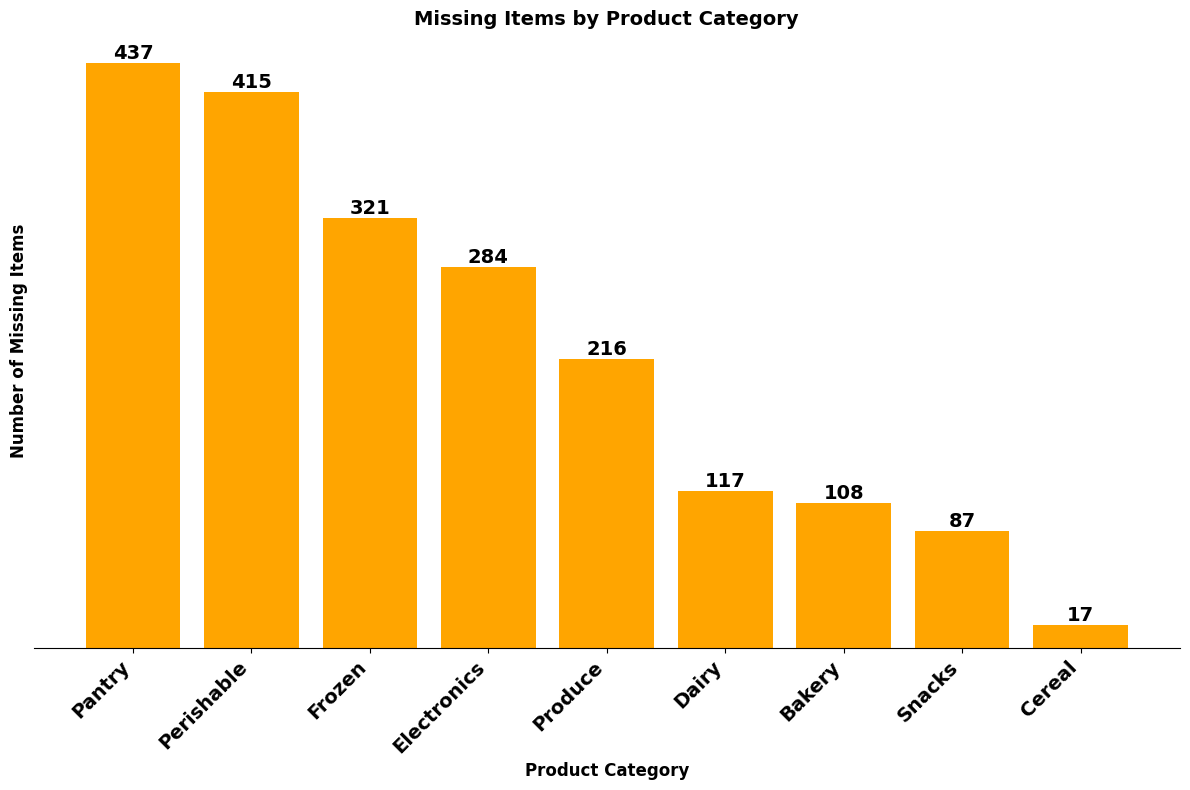

In [ ]:
# Grouping and summing missing items by product category (p1, p2, p3)
missing_items_by_category = walmart.groupby('p1.category')['items_missing'].sum()

# Including categories from p2 and p3 if available
if 'p2.category' in walmart.columns:
    missing_items_by_category = missing_items_by_category.add(
        walmart.groupby('p2.category')['items_missing'].sum(), fill_value=0)

if 'p3.category' in walmart.columns:
    missing_items_by_category = missing_items_by_category.add(
        walmart.groupby('p3.category')['items_missing'].sum(), fill_value=0)

# Sorting categories by missing items in descending order
missing_items_by_category = missing_items_by_category.sort_values(ascending=False)

# Plotting the data
plt.figure(figsize=(12, 8))
bars = plt.bar(missing_items_by_category.index, missing_items_by_category.values, color='orange')

# Adding labels on top of the bars
for bar, value in zip(bars, missing_items_by_category.values):
    plt.text(bar.get_x() + bar.get_width() / 2,
             value,
             f'{int(value)}',  # Display the value
             ha='center', va='bottom', fontsize=14, fontweight='bold')

# Plot settings
plt.xlabel('Product Category', fontsize=12, fontweight='bold')  # Adjusted font size and weight for X-axis label
plt.ylabel('Number of Missing Items', fontsize=12, fontweight='bold')  # Adjusted font size and weight for Y-axis label
plt.title('Missing Items by Product Category', fontsize=14, fontweight='bold')  # Adjusted font size for the title

# Removing Y-axis numbers
plt.gca().yaxis.set_ticks([])  # Remove ticks and labels from Y-axis

# Removing the top, right, and left spines, keeping only the bottom (X-axis) spine
plt.gca().spines['top'].set_visible(False)  # Hide top spine
plt.gca().spines['right'].set_visible(False)  # Hide right spine
plt.gca().spines['left'].set_visible(False)  # Hide left spine
plt.gca().spines['bottom'].set_visible(True)  # Keep bottom spine (X-axis)

# Formatting X-axis ticks in bold with adjusted font size
plt.xticks(fontsize=14, fontweight='bold', rotation=45, ha='right')  # Rotate category names for readability

# Displaying the plot
plt.tight_layout()
plt.show()


**High-value electronics are sporadically reported as missing, possibly due to mismanagement during fulfillment.**
**If the electronics were often reported as missing item, it could have a correlation with either driver or costumer.**

<ipython-input-49-4d76fa3d170c>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  total_price_by_category = walmart.groupby('p1.category').apply(lambda x: (x['items_missing'] * x['p1.price']).sum())
<ipython-input-49-4d76fa3d170c>:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  walmart.groupby('p2.category').apply(lambda x: (x['items_missing'] * x['p2.price']).sum()), fill_value=0)
<ipython-input-49-4d76f

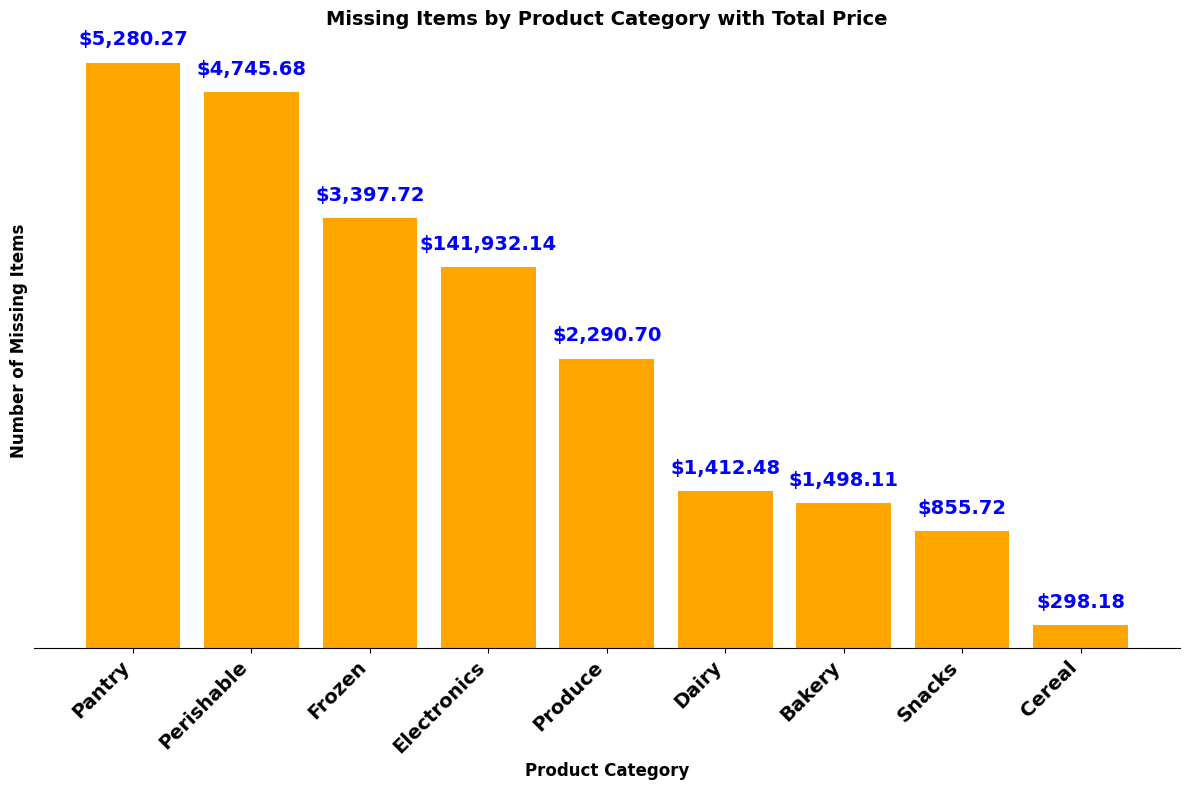

In [ ]:
# Grouping and summing missing items by product category (p1, p2, p3)
missing_items_by_category = walmart.groupby('p1.category')['items_missing'].sum()

# Including categories from p2 and p3 if available
if 'p2.category' in walmart.columns:
    missing_items_by_category = missing_items_by_category.add(
        walmart.groupby('p2.category')['items_missing'].sum(), fill_value=0)

if 'p3.category' in walmart.columns:
    missing_items_by_category = missing_items_by_category.add(
        walmart.groupby('p3.category')['items_missing'].sum(), fill_value=0)

# Grouping and summing total price for missing items by category (p1, p2, p3)
total_price_by_category = walmart.groupby('p1.category').apply(lambda x: (x['items_missing'] * x['p1.price']).sum())

if 'p2.category' in walmart.columns:
    total_price_by_category = total_price_by_category.add(
        walmart.groupby('p2.category').apply(lambda x: (x['items_missing'] * x['p2.price']).sum()), fill_value=0)

if 'p3.category' in walmart.columns:
    total_price_by_category = total_price_by_category.add(
        walmart.groupby('p3.category').apply(lambda x: (x['items_missing'] * x['p3.price']).sum()), fill_value=0)

# Sorting categories by missing items in descending order
missing_items_by_category = missing_items_by_category.sort_values(ascending=False)

# Plotting the data
plt.figure(figsize=(12, 8))
bars = plt.bar(missing_items_by_category.index, missing_items_by_category.values, color='orange')

# Adding only total price labels on top of the bars (removing missing count)
for bar, category in zip(bars, missing_items_by_category.index):
    total_price = total_price_by_category.get(category, 0)  # Getting total price value

    # Display total price of missing items
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10,  # Adjust position above bars
             f'${total_price:,.2f}',
             ha='center', va='bottom', fontsize=14, fontweight='bold', color='blue')

# Plot settings
plt.xlabel('Product Category', fontsize=12, fontweight='bold')
plt.ylabel('Number of Missing Items', fontsize=12, fontweight='bold')
plt.title('Missing Items by Product Category with Total Price', fontsize=14, fontweight='bold')

# Removing Y-axis numbers for clarity
plt.gca().yaxis.set_ticks([])

# Removing unnecessary spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)

# Formatting X-axis ticks
plt.xticks(fontsize=14, fontweight='bold', rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


### 6.6 Missing items by product name (p1, p2, p3)

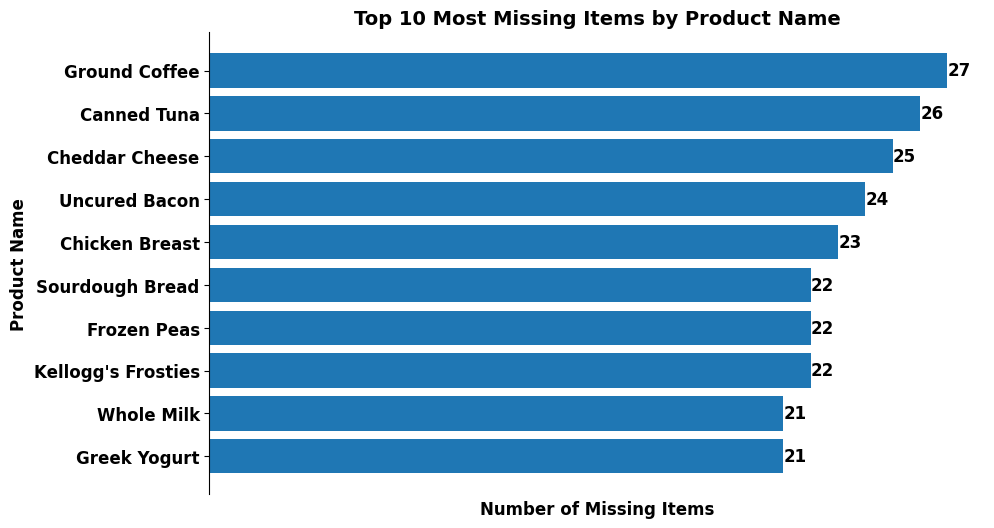

In [ ]:
# Summing missing items by product (p1, p2, p3)
missing_items_by_product = walmart.groupby('p1.product_name')['items_missing'].sum()

# Adding missing items from p2 and p3 if available
if 'p2.product_name' in walmart.columns:
    missing_items_by_product = missing_items_by_product.add(
        walmart.groupby('p2.product_name')['items_missing'].sum(), fill_value=0)

if 'p3.product_name' in walmart.columns:
    missing_items_by_product = missing_items_by_product.add(
        walmart.groupby('p3.product_name')['items_missing'].sum(), fill_value=0)

# Sorting by the number of missing items in descending order
top_missing_products = missing_items_by_product.sort_values(ascending=False).head(10)

# Plotting the most missing items
plt.figure(figsize=(10, 6))
bars = plt.barh(top_missing_products.sort_values().index,  # Sort for horizontal plot
                top_missing_products.sort_values().values,
                color='#1f77b4')  # Set color to '#1f77b4'

# Adding labels on the bars
for bar, value in zip(bars, top_missing_products.sort_values().values):
    plt.text(value,
             bar.get_y() + bar.get_height() / 2,
             f'{int(value)}',  # Display the value
             ha='left', va='center', fontsize=12, fontweight='bold')

# Plot settings
plt.ylabel('Product Name', fontsize=12, fontweight='bold')  # Adjust font size for Y-axis label
plt.xlabel('Number of Missing Items', fontsize=12, fontweight='bold')  # Adjust font size for X-axis label
plt.title('Top 10 Most Missing Items by Product Name', fontsize=14, fontweight='bold')  # Adjust font size for title

# Adjusting the spines to remove the box and keep only the Y-axis line
plt.gca().spines['top'].set_visible(False)  # Hide top spine
plt.gca().spines['right'].set_visible(False)  # Hide right spine
plt.gca().spines['bottom'].set_visible(False)  # Hide bottom spine
plt.gca().spines['left'].set_visible(True)  # Keep left spine (Y-axis)

# Formatting axis labels
plt.yticks(fontsize=12, fontweight='bold')  # Product names in bold with size 12
plt.xticks([])  # Remove numbers from X-axis

# Removing gridlines on X-axis
plt.grid(False)  # Disable all gridlines

# Displaying the plot
plt.show()

 **Pantry and Perishable groceries (e.g., Ground Coffee, Chedddar Cheese,and Uncured bacon) dominate missing items, indicating forecasting errors and supply chain gaps.**

### 6.7 Missing Items with price

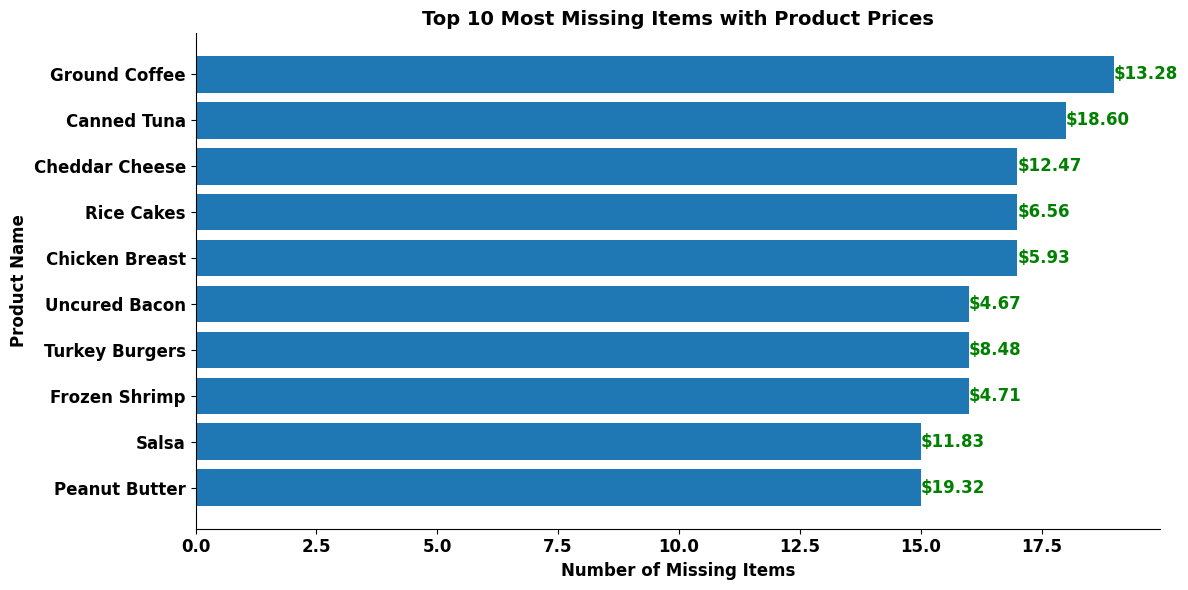

In [ ]:
# Grouping and aggregating data for the top 10 most missing items
top_missing_products_prices = walmart.groupby('p1.product_name').agg(
    {'items_missing': 'sum', 'p1.price': 'first'}  # Use 'first' to ensure correct unit price
)

# Sorting and selecting the top 10 most missing items
top_missing_products_prices = top_missing_products_prices.sort_values(by='items_missing', ascending=False).head(10)

# Inverting the order to display the most missing item at the top
top_missing_products_prices = top_missing_products_prices.iloc[::-1]

# Plotting the horizontal bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(top_missing_products_prices.index,
                top_missing_products_prices['items_missing'],
                color='#1f77b4')  # Use blue for consistency with the correct chart

# Adding price labels on top of the bars
for bar, price in zip(bars, top_missing_products_prices['p1.price']):
    plt.text(bar.get_width(),
             bar.get_y() + bar.get_height() / 2,
             f'${price:.2f}',  # Display prices with 2 decimal places
             ha='left', va='center', fontsize=12, fontweight='bold', color='green')

# Plot settings
plt.xlabel('Number of Missing Items', fontsize=12, fontweight='bold')  # Adjust X-axis label
plt.ylabel('Product Name', fontsize=12, fontweight='bold')  # Adjust Y-axis label
plt.title('Top 10 Most Missing Items with Product Prices', fontsize=14, fontweight='bold')  # Adjust title

# Removing the top and right spines, keeping the X and Y axes
plt.gca().spines['top'].set_visible(False)  # Hide top spine
plt.gca().spines['right'].set_visible(False)  # Hide right spine
plt.gca().spines['bottom'].set_visible(True)  # Keep bottom spine (X-axis)
plt.gca().spines['left'].set_visible(True)  # Keep left spine (Y-axis)

# Formatting axis labels
plt.xticks(fontsize=12, fontweight='bold')  # X-axis labels with font size 12
plt.yticks(fontsize=12, fontweight='bold')  # Y-axis labels with font size 12

# Removing gridlines
plt.grid(False)  # Disable all gridlines

# Displaying the plot
plt.tight_layout()
plt.show()



**Low-cost products are more affected, likely due to high demand and frequent stockouts.**

In [ ]:
#Peak Hour Vulnerabilities:
    #High missing rates during early mornings (6–7 AM) and late nights (10–11 PM) suggest inventory restocking issues or low staffing levels.

#Product Types Prone to Missing Items:
        #Perishable groceries (e.g., milk, chicken, and produce) dominate missing items, indicating forecasting errors and supply chain gaps.
        #Electronics, though fewer, are high-value items vulnerable to limited stock availability or handling errors.

#Price Trends:
        #Low-cost products are more affected, likely due to high demand and frequent stockouts.
        #High-value electronics are sporadically reported as missing, possibly due to mismanagement during fulfillment.

## **7. Correlation Analyses**

> Add blockquote



**The goal is understand the relation between variables and identify patterns unsing the Heatmap Correlation to visualize multiple variables.**

### 7.1 Correlation Heatmap

<ipython-input-53-d66e539db847>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['driver'] = LabelEncoder().fit_transform(walmart['driver_name'])
<ipython-input-53-d66e539db847>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['customer'] = LabelEncoder().fit_transform(walmart['customer_name'])
<ipython-input-53-d66e539db847>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

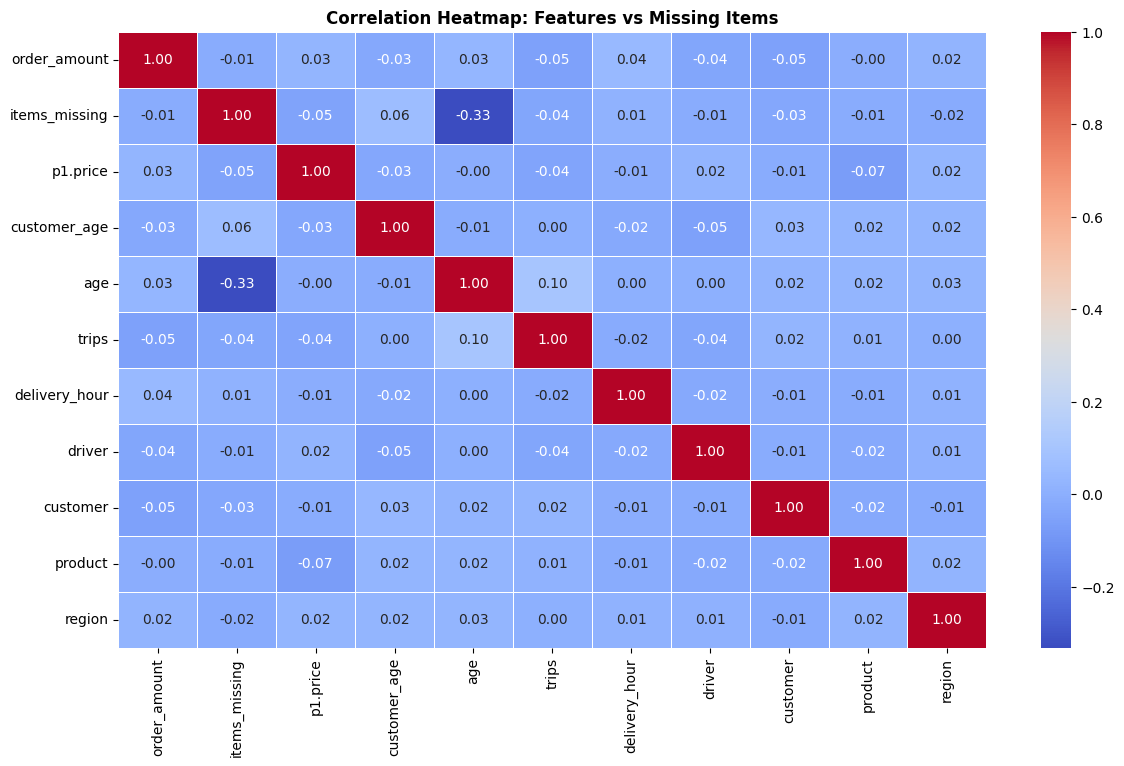

In [ ]:
# Select variables for analysis
features = walmart[[
    'order_amount', 'items_missing', 'p1.price',  # Existing variables
    'customer_age', 'age', 'trips',               # New requested variables
    'delivery_hour'                               # Already formatted hour
]]

# Encode categorical variables without 'encoded' in labels
features['driver'] = LabelEncoder().fit_transform(walmart['driver_name'])
features['customer'] = LabelEncoder().fit_transform(walmart['customer_name'])
features['product'] = LabelEncoder().fit_transform(walmart['p1.product_name'])
features['region'] = LabelEncoder().fit_transform(walmart['region'])  # Encode region

# Remove null values
features = features.dropna()

# Calculate the correlation matrix
corr = features.corr()

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap: Features vs Missing Items', fontweight='bold')
plt.show()


**Key Findings:**

**Driver Experience (age):** Driver age has a moderate and negative impact on the number of missing items, suggesting that more experienced drivers may handle logistics and inventory management more effectively.

**Product Price (p1.price)**:Higher-priced products tend to be less prone to shortages, possibly due to greater focus on quality control and inventory management.

**Region and Delivery Hour:** These variables do not appear to have a direct impact on missing items, suggesting that logistical issues may be more related to inventory management than location or delivery timing.

## 8.Temporal Trend Analysis

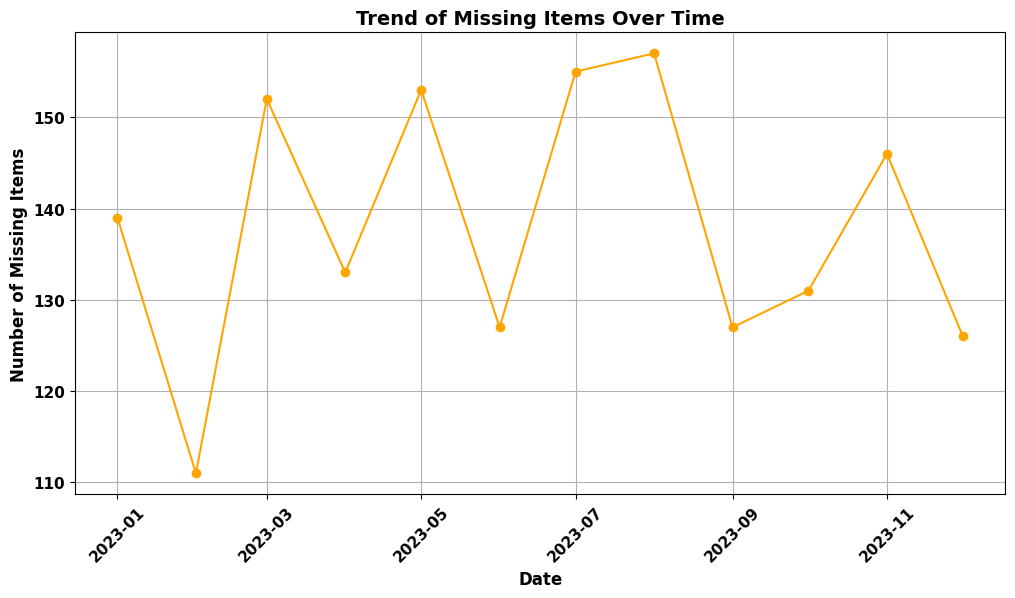

In [ ]:
# Convert the 'date' column to datetime format
walmart['date'] = pd.to_datetime(walmart['date'])

# Group data by month to analyze the trend over time
df_trend = walmart.groupby(walmart['date'].dt.to_period("M"))['items_missing'].sum().reset_index()

# Convert period back to datetime for plotting
df_trend['date'] = df_trend['date'].astype(str)
df_trend['date'] = pd.to_datetime(df_trend['date'])

# Create the trend plot
plt.figure(figsize=(12,6))
plt.plot(df_trend['date'], df_trend['items_missing'], marker='o', linestyle='-', color='orange')

# Formatting the titles with bold font and size 12
plt.title('Trend of Missing Items Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Number of Missing Items', fontsize=12, fontweight='bold')

# Formatting x-axis and y-axis values in bold
plt.xticks(fontsize=11, fontweight='bold', rotation=45)  # Bold and rotated X labels
plt.yticks(fontsize=11, fontweight='bold')  # Bold Y labels

# Grid for better readability
plt.grid(True)

# Show the plot
plt.show()




**The time trend chart** displays the variation in the number of missing items over the months of 2023. The analysis reveals significant fluctuations, with periods of increase and decline, suggesting that the issue may be linked to seasonal factors, operational challenges, or changes in the logistics process.

## **8. Conclusions and Hipothesis**

**Peak Hour Vulnerabilities:** High missing rates during early mornings (6–7 AM) and late nights (10–11 PM) suggest inventory restocking issues or low staffing levels.

**Product Types Prone to Missing Items:** Perishable groceries (e.g., milk, chicken, and produce) dominate missing items, indicating forecasting errors and supply chain gaps. Electronics, though fewer, are high-value items vulnerable to limited stock availability or handling errors.

**Price Trends:** Low-cost products are more affected, likely due to high demand and frequent stockouts. High-value electronics are sporadically reported as missing, possibly due to mismanagement during fulfillment.

**50% of missing products are priced below $13.27**, mostly low-cost supermarket items

**1 missing item in the average**. The dat shows a patterns of 1 missing item in the average per order, indicating mismanagement during fufillment during peak hours.

## **9. Data Improvements Proposal.**


**The datasets provided give us a understanding of the orders, drivers and customres with its missing items data, however it lacks with stock, and loaded items, in which could elucidated when and where the item could have been missed**.

## **10. Recommendations**

**Review inventory management** Prioritize products that are more susceptible to losses, such as perishables.

**Forecasting** Improve demand forecasting to prevent stockouts and inventory shortages.